# The Spam Detector
keywords: NLP (TALN), classification.
## Description

Madame Esposito développe pour son entreprise un chatbot dans le but de répondre automatiquement à ses nombreux clients. Cependant son programme reçoit un grand nombre de message malveillant ou à caractère publicitaire ce qui dégrade les performance de son bot en plus d'occasionner des traitements informatique se répercutant sur sa facture d'électricité.

Madame Esposito vous a contacté afin de créer un programme capable de détecter automatiquement les SPAM. 
Pour cela, elle a construit un jeux de donnée comportant un ensemble de SMS de type SPAM et NON SPAM (HAM), disponible à l'adresse suivante : 
http://www.dt.fee.unicamp.br/~tiago/smsspamcollection/

Par ailleurs, afin d'intégrer les résultats dans son équipe, elle nous demande les choses suivantes:
* Afin d'estimer le cout du développement et suivre le projet, une checklist des taches à réaliser doit être rédigé.
* Vous devez créer des fonctions pour les différentes partie de votre code afin de pouvoir les réutiliser facilement
* Vous devez effectuer une validation croisé (cross-validation) sur 10 jeux d'apprentissage et de test différent. Le seed doit être fixé à 42 et le jeux de test doit représenter 20% des données.
* Comparer au moins trois algorithme de classification en terme de **f1 score**. Lequel est le plus puissant ?
## Bonus


Pouvez améliorer les résultats ?
* est-ce que la lemmatisation améliore les résultats ?
* est-ce que la racinisation (stemming)  améliore les résultats ?

Une fois ces étapesréalisées, reproduire la même expérience avec le jeux suivant, représentant cette fois des commentaires Youtube :
https://archive.ics.uci.edu/ml/datasets/YouTube+Spam+Collection

Les performances sont-elles similaire à ceux obtenus avec le jeux de données précèdent ?

Madame esposito souhaite contrôler si les modèles appris avec le premier jeux de données sont capable de prédire les données de test du deuxième jeu et vice-versa.
Réaliser un tableau comparant
* les résultats de prédiction du modelés appris sur les SPAN SMS pour prédire les SPAM commentaire Youtube.
* et les résultats de prédiction du modèles appris sur les SPAM commentaire Youtube pour prédire les SPAM SMS.

### Import librairies

In [335]:
#### Import librairies
import numpy as np
import nltk 
from nltk.corpus import stopwords
import pandas as pd
### Sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import recall_score , precision_score
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import f1_score
#vis
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
#os
import time
start_time = time.time()

### Team randomization

In [336]:
app = 'Anthony Constant Joshua Fatima Julien Bassem Caroline Dan Ines Nidhal Sacia Xavier Roger Hachem Jean-Pierre Myriam Ludo Olivier Pierre-Etienne Wiem Cecilia'.split()
s = app
 
np.random.seed(1)
rapp = [s[i] for i in np.random.choice(21, 21, replace=False)]
for i in range(4):
    e = rapp
    print(e[4*i:4*i+4] + ([e[-1]] if i == 3 else []))

['Myriam', 'Sacia', 'Fatima', 'Pierre-Etienne']
['Olivier', 'Jean-Pierre', 'Ludo', 'Julien']
['Joshua', 'Caroline', 'Dan', 'Constant']
['Hachem', 'Anthony', 'Cecilia', 'Wiem', 'Bassem']


# Proposed Plan

**1) Veille en Traitement du langage + checklist+45min**

https://becominghuman.ai/a-simple-introduction-to-natural-language-processing-ea66a1747b32

https://towardsdatascience.com/your-guide-to-natural-language-processing-nlp-48ea2511f6e1

https://code.tutsplus.com/fr/tutorials/introducing-the-natural-language-toolkit-nltk--cms-28620

https://towardsdatascience.com/introduction-to-natural-language-processing-for-text-df845750fb63

* parsing and tokenization ?
* vectorization ? Bag of words ?
* advantage of TFIDF ?
* stops words ?

## [Audit](https://github.com/ejhb/audit/blob/master/2020/12-december/01-chat-bot/audit/audit.pdf)

Joshua :
### NLP

L'analyse naturelle du langage (NLP: Natural Language Processing) provient d'un processus automatique ou semi-automatique du langage humain.

### Qu'est-ce que c'est NLTK ?

Natural Language Toolkit (NLTK) est une boîte-à-outil permettant la création de programmes pour l'analyse de texte. Cet ensemble a été créé à l'origine par Steven Bird et Edward Loper, en relation avec des cours de linguistique informatique à l'Université de Pennsylvanie en 2001. Il existe un manuel d'apprentissage pour cet ensemble titré Natural Language Processing with Python (en anglais).

```
import nltk
nltk.download()
```
Télécharger tout le package si nécessaire si vous ne connaisser pas les données sur lesquelles travailler.

```
from nltk.corpus import stopwords
print(set(stopwords.words('English')))
```

Stop Words
Parfois, nous avons besoin de "raboter" des éléments inutiles afin que les données soient davatange traduisibles pour l'ordinateur. En NLP, de telles données (des mots, words) sont qualifiées par stop words. Par conséquent, ces mots n'ont aucune signification pour nous, et nous souhaiterions les retirer.

La "tokénisation", telle que définie dans Wikipedia, est :

Il s'agit du processus consistant à briser un flux de texte en plusieurs mots, phrases, symboles ou tout autre élements significatifs dénommés Signes (tokens).


```
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
 
text = 'In this tutorial, I\'m learning NLTK. It is an interesting platform.'
stop_words = set(stopwords.words('english'))
words = word_tokenize(text)
 
new_sentence = []
 
for word in words:
    if word not in stop_words:
    new_sentence.append(word)
 
print(new_sentence)
```
>> 'In','tutorial',',',"'m",'learning','NTLK','.','It','interesting','platform','.'


La "tokénisation", telle que définie dans Wikipedia, est :

Il s'agit du processus consistant à briser un flux de texte en plusieurs mots, phrases, symboles ou tout autre élements significatifs dénommés Signes (tokens).

Nous désirerions rechercher (fouiner) le mot *language*. 
```
import nltk
 
file = open('NLTK.txt', 'r')
read_file = file.read()
text = nltk.Text(nltk.word_tokenize(read_file))
 
match = text.concordance('language')
```

### Compte rendu :

*   La tokénization est le fait de segmenter un flux textuel avec des motif pré-établis ou des token personalisé.

*   Le Bag of words est le comptage de mots dans un corpus. Il crée une matrice d’occurences sans tenir compte de la grammaire ou de l’ordre des mots, certain mots peuvent produire un bruit dans l'analyse. Un des moyens pour amélioré notre bag of words est d'utilisé le TFI-DF qui établis un ranking des mots en fonction de la fréquence à laquelle il est utilisé.

*   Stop word sont les mots qui seraient considéré comme asémentique dans un string comme, les conjonction ou des mot common. Cette liste est amener à changer en fonction du contexte et de la langue.*Le string parsing, est le regroupement des mot sémantique. Ce sont les mots qui seront utilisé pour faire comprendre le sens d'une phrase à la machine.

*   Stemming Le fait d’enlever des préfixes et/ou des suffixes d’un mot car ces derniers ont tendance à produire de nouveaux mots à partir d’un seul mot (ex : guitar et guitarist).

*   Lemmatization Il a pour objectif de réduire le mot à sa base (ex : went qui est changé en go).

### NLTK package Manager
We have installed punkt & stopword package 

```
>>> import nltk
>>> nltk.download()
```
![alt text](./img/nltk_dl.png "Les Gnocchis sont cuits")

### Pandas display settings

In [337]:
# Remove display limiter
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.set_option('display.width', None)
# pd.set_option('display.max_colwidth', -1)
# pd.reset_option("^display") ##Reset display option

**2) Load, clean and prepare the data**

Vectoriser et netoyer vos données.
https://scikit-learn.org/stable/modules/feature_extraction.html#text-feature-extraction

Quelle est le type Python de vos données après vectorisation.

* Quelle sont les 10 mots les plus fréquent dans le jeux de données ?
* Les moins fréquents ?
* Tracer la distribution de la fréquence des mots présents dans le jeux de données. Qu'observez vous ?


In [338]:
col_names = ["type","sentence"]

# df = pd.read_csv ("./data/SMSSpamCollection.txt", header=None, sep='\t', names=col_names)
# df['type_bool'] = df['type'].replace({'ham':0, 'spam':1}) #Bool col_type spam or ham
# df.to_csv ("./data/SMSSpamCollection.csv", index=None)

df = pd.read_csv("./data/SMSSpamCollection.csv")

x = df['sentence'] ## SMS content as Corpus
y = df['type_bool'] ## Spam or Not as Target

[Text(0, 0.5, 'Number of times'),
 Text(0.5, 0, 'Words'),
 Text(0.5, 1.0, 'Most used words')]

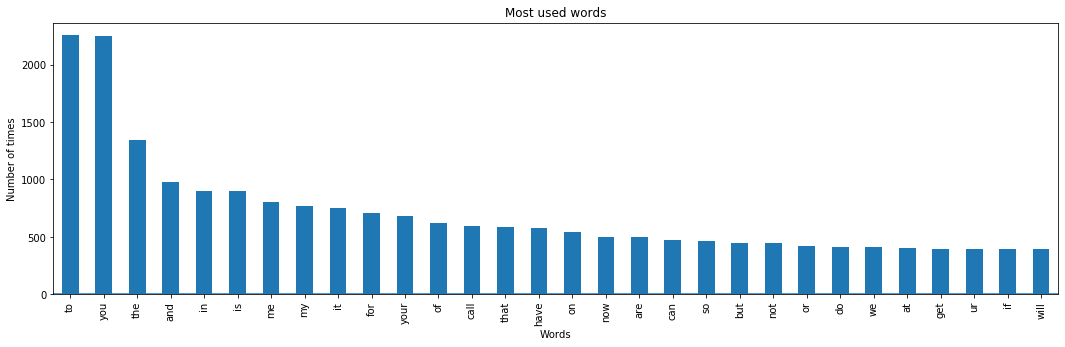

In [353]:
def get_top_n_words(corpus,d,n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    if d == "up" :
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:n]
    elif d == "down" :
        words_freq=sorted(words_freq, key = lambda x: x[1], reverse=False)
        return words_freq[:n]

freq_top = get_top_n_words(x,"up",100)
freq_down = get_top_n_words(x,"down",100)

df_up = pd.DataFrame(freq_top, columns =['Word','Number of times'])
df_down = pd.DataFrame(freq_down, columns =['Word','Number of times'])
df_up.groupby('Word')['Number of times'].sum().sort_values(ascending=False).head(30).plot(kind='bar', figsize = (18,5))
# sns.distplot(df_up['Number of times']).set(title='Most used words',xlabel='Words',ylabel='Number of times')

In [2]:
y_nbr = df_up['Number of times']
x_word = df_up['Word']
fig, ax = plt.subplots(figsize=(20, 5),tight_layout=True)
ax.set_title('Less Used words',size=18,pad=20)
ax.set_xlabel('Words',size=15)
ax.set_ylabel('Number of times',size=15)
ax.plot(x_word, y_nbr)
ax.tick_params(axis='x',labelsize=12,pad=8,size=10, rotation=90)
plt.show()

NameError: name 'df_up' is not defined

**Aides/propositions**
* Stop words avec NLTK
* scikit-learn pour la vectorization


In [343]:

my_stop_words = stopwords.words('english') #Stop words from NLTK package
# Count Vectorizer 
cv = CountVectorizer(stop_words=my_stop_words) 

x_cv = cv.fit_transform(x) ## Count Vectorizer Model
print("-- TF-IDF vector shape :",x_cv.shape)

-- TF-IDF vector shape : (5572, 8577)


In [344]:
# TF-IDF Vectorizer 
v_tf = TfidfVectorizer(stop_words=my_stop_words)
x_tf = v_tf.fit_transform(x)
# TF-IDF Model
idf_values = dict(zip(v_tf.get_feature_names(), v_tf.idf_))
words_name = v_tf.get_feature_names()

print("-- TF-IDF vector shape :",x_tf.shape)
# print(x_tf[0:10])
# print(v_tf.vocabulary_) ## Printing the vocabulary

-- TF-IDF vector shape : (5572, 8577)


In [345]:
# Train pack with TF-IDF Vectorizer
x_tf_train, x_tf_test, y_train, y_test = train_test_split(x_tf, y, test_size=0.20, random_state=0)
print('-- Training pack TF-IDF:',"\n")
print('-- x_tf_train rows :',np.size(x_tf_train))
print('-- x_tf_test rows :',np.size(x_tf_test))
print('-- ratio in % :', round(np.size(x_tf_test)/(np.size(x_tf_train)+np.size(x_tf_test))*100,2),"\n") 

# Train pack with Count Vectorizer
x_train, x_test, y_train, y_test = train_test_split(x_cv, y, test_size=0.20, random_state=0)
print('-- Training pack w/o TF-ID:',"\n")
print('-- x_train rows :',np.size(x_train))
print('-- x_test rows :',np.size(x_test))
print('-- ratio in % :', round(np.size(x_test)/(np.size(x_train)+np.size(x_test))*100,2)) 

-- Training pack TF-IDF: 

-- x_tf_train rows : 37686
-- x_tf_test rows : 9684
-- ratio in % : 20.44 

-- Training pack w/o TF-ID: 

-- x_train rows : 37686
-- x_test rows : 9684
-- ratio in % : 20.44


In [346]:
# Logistic regression TF-IDF Vectorizer
loR_tf = LogisticRegression()
loR_tf.fit(x_tf_train, y_train) #Model w tf-idf
pred_tf = loR_tf.predict(x_tf_test)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))
print('-- Predition tf-idf set :',pred_tf[:100],'\n')
print('-- Recall_score tf-idf set:',round(recall_score(y_test, pred_tf),3))
print('-- Precision_score tf-idf set:',round(precision_score(y_test, pred_tf),3))

-- Loading time : 3.1216318607330322 secondes. --
-- Predition tf-idf set : [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

-- Recall_score tf-idf set: 0.7
-- Precision_score tf-idf set: 0.982


In [347]:
# Logistic regression Count Vectorizer
loR = LogisticRegression()
loR.fit(x_train, y_train) #Model w/o tf-idf
pred = loR.predict(x_test)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))
print('-- Prediction base_set:',pred[:100],'\n')
print('-- Recall_score base_set:',round(recall_score(y_test, pred, average ='micro'),3))
print('-- Precision_score base_set:',round(precision_score(y_test, pred, average ='micro'),3),'\n')

-- Loading time : 3.2168540954589844 secondes. --
-- Prediction base_set: [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

-- Recall_score base_set: 0.983
-- Precision_score base_set: 0.983 



In [348]:
# logistic regression SVM base set
clf = svm.SVC()
clf.fit(x_train,y_train)
predSVM = clf.predict(x_test)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))
print('-- Prediction base_set:',pred[:100],'\n')
print('-- Recall_score base_set:',round(recall_score(y_test, predSVM, average ='micro'),3))
print('-- Precision_score base_set:',round(precision_score(y_test, predSVM, average ='micro'),3),'\n')

-- Loading time : 4.1436755657196045 secondes. --
-- Prediction base_set: [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

-- Recall_score base_set: 0.982
-- Precision_score base_set: 0.982 



In [349]:
# logistic regression SVM TF-IDF set
clf = svm.SVC()
clf.fit(x_tf_train,y_train)
predSVM = clf.predict(x_tf_test)
print("-- Loading time : %s secondes. --" % (time.time() - start_time))
print('-- Prediction TF-IDF_set:',pred[:100],'\n')
print('-- Recall_score TF-IDF_set:',round(recall_score(y_test, predSVM, average ='micro'),3))
print('-- Precision_score TF-IDF_set:',round(precision_score(y_test, predSVM, average ='micro'),3),'\n')

-- Loading time : 5.797388553619385 secondes. --
-- Prediction TF-IDF_set: [0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

-- Recall_score TF-IDF_set: 0.978
-- Precision_score TF-IDF_set: 0.978 



**3) Apprenstissage**

Que représente la mesure f1 ?
Quelles sont ces avantages sur d'autre mesure tel que la précision le rappel ou l'accuracy ?

**3) Veille cross validation**
https://scikit-learn.org/stable/modules/cross_validation.html

Utilisez la méthode de [ShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit) pour construire vos jeux de données permettant la validation croisée.

**4) Train**

Fit the models and compare the performance in a table that show
* the mean of the f1 score
* the standard deviation of the f1 score

Qu'observez vous ?